In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
death = pd.read_csv('death_final.csv')
education = pd.read_csv('education_final.csv')
unemployment = pd.read_csv('unemployment_final.csv')
poverty = pd.read_csv('poverty_final.csv')

In [150]:
death.head()

,FIPS,"Age-Adjusted Death Rate([rate note]) - deaths per 100,000"
0,0,152.4
1,12125,441.1
2,51640,384.3
3,20095,315.8
4,51580,293.1


In [151]:
education.head()

,FIPS Code,State,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970","Percent of adults completing some college (1-3 years), 1970","Percent of adults completing four years of college or higher, 1970","Percent of adults with less than a high school diploma, 1980",...,"Percent of adults completing some college or associate's degree, 1990","Percent of adults with a bachelor's degree or higher, 1990","Percent of adults with less than a high school diploma, 2000","Percent of adults with a high school diploma only, 2000","Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,0,US,United States,NaN,NaN,47.7,31.1,10.6,10.7,33.5,...,24.9,20.3,19.6,28.6,27.4,24.4,12.0,27.0,28.9,32.1
1,1000,AL,Alabama,NaN,NaN,58.7,25.9,7.5,7.8,43.5,...,21.7,15.7,24.7,30.4,25.9,19.0,13.8,30.8,29.9,25.5
2,1001,AL,Autauga County,2.0,2.0,54.8,31.1,7.7,6.4,40.6,...,23.5,14.5,21.3,33.8,26.9,18.0,11.5,33.6,28.4,26.6
3,1003,AL,Baldwin County,3.0,2.0,59.4,26.7,7.4,6.5,39.7,...,24.6,16.8,18.0,29.6,29.3,23.1,9.2,27.7,31.3,31.9
4,1005,AL,Barbour County,6.0,6.0,68.8,19.0,4.9,7.3,55.1,...,16.7,11.8,35.3,32.4,21.3,10.9,26.8,35.6,26.0,11.6


In [152]:
unemployment.head()

,FIPS,Civilian_labor_force_2015,Unemployed_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Unemployed_2020,Unemployment_rate_2020
0,0,"156,840,649","8,285,731",5.3,"158,674,951","7,725,602",4.9,"160,214,378","6,977,228",4.4,"161,441,134","6,288,584",3.9,"163,140,305","5,986,120",3.7,"160,611,064","12,933,704",8.1
1,1000,"2,152,295","131,852",6.1,"2,155,729","126,572",5.9,"2,172,455","99,059",4.6,"2,207,019","86,315",3.9,"2,237,278","67,883",3.0,"2,230,118","131,056",5.9
2,1001,"25,541","1,335",5.2,"25,710","1,315",5.1,"25,898","1,040",4.0,"26,081",941,3.6,"26,281",720,2.7,"25,838","1,262",4.9
3,1003,"87,493","4,874",5.6,"89,778","4,806",5.4,"91,838","3,844",4.2,"94,820","3,445",3.6,"97,424","2,711",2.8,"96,763","5,425",5.6
4,1005,"8,590",767,8.9,"8,334",696,8.4,"8,298",498,6.0,"8,379",430,5.1,"8,502",325,3.8,"8,587",605,7.0


In [153]:
poverty.head()

,FIPS,POVALL_2019,PCTPOVALL_2019,POV017_2019,PCTPOV017_2019,MEDHHINC_2019
0,0,"39,490,096",12.3,"12,000,470",16.8,"65,712"
1,1000,"747,478",15.6,"233,890",21.9,"51,771"
2,1001,"6,723",12.1,"2,040",15.9,"58,233"
3,1003,"22,360",10.1,"6,323",13.5,"59,871"
4,1005,"5,909",27.1,"2,050",41.0,"35,972"


In [154]:
education = education.rename({'FIPS Code': 'FIPS'}, axis='columns')
death = death.rename({' FIPS': 'FIPS'}, axis='columns')

In [155]:
join_one = pd.merge(poverty, education, on = 'FIPS')
join_two = pd.merge(join_one, unemployment, on = 'FIPS')
all_data = pd.merge(join_two, death, on = 'FIPS')
all_data.shape

(3134, 49)

In [156]:
all_data = all_data.dropna()

In [157]:
all_data = all_data.rename({'Age-Adjusted Death Rate([rate note]) - deaths per 100,000': 'Death Rate'}, axis='columns')

In [158]:
all_data.isna().sum()

FIPS                                                                        0
POVALL_2019                                                                 0
PCTPOVALL_2019                                                              0
POV017_2019                                                                 0
PCTPOV017_2019                                                              0
MEDHHINC_2019                                                               0
State                                                                       0
Area name                                                                   0
2013 Rural-urban Continuum Code                                             0
2013 Urban Influence Code                                                   0
Percent of adults with less than a high school diploma, 1970                0
Percent of adults with a high school diploma only, 1970                     0
Percent of adults completing some college (1-3 years), 1970     

In [159]:
all_data.replace(',','', regex=True, inplace=True)
all_data

,FIPS,POVALL_2019,PCTPOVALL_2019,POV017_2019,PCTPOV017_2019,MEDHHINC_2019,State,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,...,Civilian_labor_force_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Unemployed_2020,Unemployment_rate_2020,Death Rate
1,1001,6723,12.1,2040,15.9,58233,AL,Autauga County,2.0,2.0,...,26081,941,3.6,26281,720,2.7,25838,1262,4.9,161.4
2,1003,22360,10.1,6323,13.5,59871,AL,Baldwin County,3.0,2.0,...,94820,3445,3.6,97424,2711,2.8,96763,5425,5.6,158.2
3,1005,5909,27.1,2050,41.0,35972,AL,Barbour County,6.0,6.0,...,8379,430,5.1,8502,325,3.8,8587,605,7.0,182.7
4,1007,4101,20.3,1147,25.9,47918,AL,Bibb County,1.0,1.0,...,8569,340,4.0,8639,268,3.1,8640,573,6.6,183.1
5,1009,9324,16.3,2750,21.0,52902,AL,Blount County,1.0,1.0,...,24960,874,3.5,25196,680,2.7,24661,1008,4.1,182.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,56037,3453,8.3,1075,10.1,80639,WY,Sweetwater County,5.0,8.0,...,21539,904,4.2,21424,856,4.0,20840,1532,7.4,162.9
3130,56039,1396,6.0,236,5.7,98837,WY,Teton County,7.0,8.0,...,15579,468,3.0,15970,449,2.8,15204,912,6.0,91
3131,56041,1699,8.5,541,9.6,70756,WY,Uinta County,7.0,8.0,...,9136,397,4.3,9280,368,4.0,9312,582,6.3,142.3
3132,56043,845,11.1,237,13.9,55122,WY,Washakie County,7.0,11.0,...,4106,174,4.2,3904,162,4.1,4004,211,5.3,144.4


In [160]:
all_data = all_data[all_data['Death Rate'] != '* ']

In [161]:
X = all_data.drop(columns=['Death Rate', 'State', 'Area name'])
y = all_data['Death Rate']

In [162]:
y = y.astype(float)
np.percentile(y, [50,75,80,85])

array([165.3 , 182.7 , 186.78, 192.4 ])

In [163]:
dummies = pd.get_dummies(all_data['State'])
dummies.shape
dummies.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
dummies = dummies.drop(columns=['UT'])

In [165]:
all_data.shape
all_data.head()

,FIPS,POVALL_2019,PCTPOVALL_2019,POV017_2019,PCTPOV017_2019,MEDHHINC_2019,State,Area name,2013 Rural-urban Continuum Code,2013 Urban Influence Code,...,Civilian_labor_force_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Unemployed_2019,Unemployment_rate_2019,Civilian_labor_force_2020,Unemployed_2020,Unemployment_rate_2020,Death Rate
1,1001,6723,12.1,2040,15.9,58233,AL,Autauga County,2.0,2.0,...,26081,941,3.6,26281,720,2.7,25838,1262,4.9,161.4
2,1003,22360,10.1,6323,13.5,59871,AL,Baldwin County,3.0,2.0,...,94820,3445,3.6,97424,2711,2.8,96763,5425,5.6,158.2
3,1005,5909,27.1,2050,41.0,35972,AL,Barbour County,6.0,6.0,...,8379,430,5.1,8502,325,3.8,8587,605,7.0,182.7
4,1007,4101,20.3,1147,25.9,47918,AL,Bibb County,1.0,1.0,...,8569,340,4.0,8639,268,3.1,8640,573,6.6,183.1
5,1009,9324,16.3,2750,21.0,52902,AL,Blount County,1.0,1.0,...,24960,874,3.5,25196,680,2.7,24661,1008,4.1,182.2


Ok, since our dimensions are consistent, we can merge these tables. 

In [166]:
X = pd.merge(X, dummies, right_index=True, left_index=True)

In [167]:
X.shape
X.head()

,FIPS,POVALL_2019,PCTPOVALL_2019,POV017_2019,PCTPOV017_2019,MEDHHINC_2019,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Percent of adults with less than a high school diploma, 1970","Percent of adults with a high school diploma only, 1970",...,SC,SD,TN,TX,VA,VT,WA,WI,WV,WY
1,1001,6723,12.1,2040,15.9,58233,2.0,2.0,54.8,31.1,...,0,0,0,0,0,0,0,0,0,0
2,1003,22360,10.1,6323,13.5,59871,3.0,2.0,59.4,26.7,...,0,0,0,0,0,0,0,0,0,0
3,1005,5909,27.1,2050,41.0,35972,6.0,6.0,68.8,19.0,...,0,0,0,0,0,0,0,0,0,0
4,1007,4101,20.3,1147,25.9,47918,1.0,1.0,73.1,19.4,...,0,0,0,0,0,0,0,0,0,0
5,1009,9324,16.3,2750,21.0,52902,1.0,1.0,70.5,22.7,...,0,0,0,0,0,0,0,0,0,0


## Preparing the Train-Test Split Along Response Variable with Differing Percentile

In [168]:
np.count_nonzero(y > 192.4) / len(y)

0.14973958333333334

In [169]:
np.count_nonzero(y > 186.78) / len(y)

0.2001953125

In [170]:
np.count_nonzero(y > 182.7) / len(y)

0.24934895833333334

In [171]:
X = X.astype(float)
y85 = (y>192.4)*1

In [172]:
y80 = (y>186.78)*1
y75 = (y>182.7)

In [173]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train85, y_test85 = train_test_split(X, y85, test_size=0.2, random_state=42)
X_train, X_test, y_train80, y_test80 = train_test_split(X, y80, test_size=0.2, random_state=42)
X_train, X_test, y_train75, y_test75 = train_test_split(X, y75, test_size=0.2, random_state=42)



## Random Forests

Try with 85th percentile.

In [174]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train85)

RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [175]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))

Confusion Matrix: 
 [[510  10]
 [ 73  22]]

Accuracy: 0.865040650406504


Try with 80th percentile. 

In [176]:
rf = RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train80)

RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [177]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[474  16]
 [ 79  46]]

Accuracy: 0.8455284552845529


Try with 75th percentile.

In [178]:
rf = RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train75)

RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [179]:
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test75, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[428  39]
 [ 86  62]]

Accuracy: 0.7967479674796748


## Scikit-Learn Log

In [209]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train85)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [218]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > .5 else 0 for x in y_prob[:,1]], index=y_test85.index)

cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))


Confusion Matrix: 
 [[519   1]
 [ 93   2]]

Accuracy: 0.8471544715447155


In [226]:
logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train80)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [227]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > .5 else 0 for x in y_prob[:,1]], index=y_test80.index)

cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[488   2]
 [121   4]]

Accuracy: 0.8


In [228]:
logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train75)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [229]:
y_prob = logreg.predict_proba(X_test)
y_pred = pd.Series([1 if x > .5 else 0 for x in y_prob[:,1]], index=y_test75.index)

cm = confusion_matrix(y_test75, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[464   3]
 [145   3]]

Accuracy: 0.759349593495935


## Boosting

In [182]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10)
gbc.fit(X_train, y_train85)


GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=3300)

In [183]:
y_pred = gbc.predict(X_test)
(y_test85 == y_pred).mean()

0.8747967479674796

In [219]:
gbc = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10)
gbc.fit(X_train, y_train80)

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=3300)

In [220]:
y_pred = gbc.predict(X_test)
(y_test80 == y_pred).mean()

0.8341463414634146

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10)
gbc.fit(X_train, y_train75)

In [221]:
y_pred = gbc.predict(X_test)
(y_test75 == y_pred).mean()

0.8097560975609757

## LDA

In [184]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train85)

LinearDiscriminantAnalysis()

In [185]:
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))

Confusion Matrix: 
 [[491  29]
 [ 56  39]]

Accuracy: 0.8617886178861789


In [222]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train80)

LinearDiscriminantAnalysis()

In [223]:
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[459  31]
 [ 69  56]]

Accuracy: 0.8373983739837398


In [224]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train75)

LinearDiscriminantAnalysis()

In [225]:
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test75, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[427  40]
 [ 78  70]]

Accuracy: 0.808130081300813


## CV Decision Tree

In [238]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0.001, 0.1, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train, y_train85)


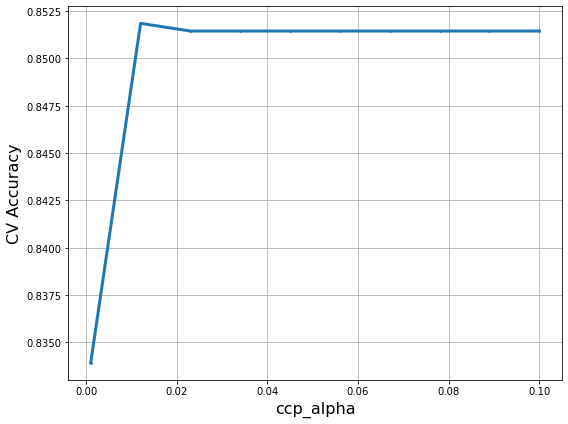

Best ccp_alpha {'ccp_alpha': 0.012}


In [239]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [240]:
y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))

Confusion Matrix: 
 [[520   0]
 [ 95   0]]

Accuracy: 0.8455284552845529


In [242]:
grid_values = {'ccp_alpha': np.linspace(0.001, 0.1, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train, y_train80)


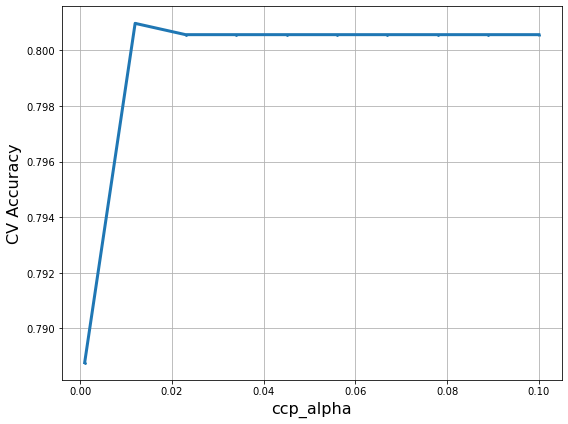

Best ccp_alpha {'ccp_alpha': 0.012}


In [243]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [244]:
y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[490   0]
 [125   0]]

Accuracy: 0.7967479674796748


In [246]:
grid_values = {'ccp_alpha': np.linspace(0.001, 0.1, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train, y_train75)


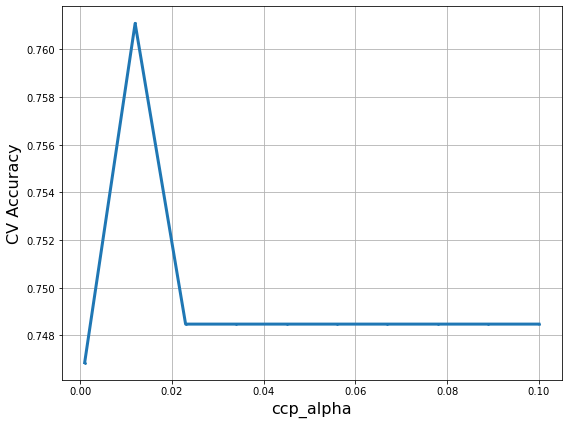

Best ccp_alpha {'ccp_alpha': 0.012}


In [247]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [248]:
y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[490   0]
 [125   0]]

Accuracy: 0.759349593495935


## Interpretable Statsmodels Log

In [230]:
import statsmodels.api as sm

log_reg1 = sm.Logit(y_train85, X_train).fit()


         Current function value: 0.270986
         Iterations: 35


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [231]:
predis = (log_reg1.predict(X_test) > 0.5) * 1

In [232]:
np.mean(predis == y_test85)

0.865040650406504

In [234]:
log_reg2 = sm.Logit(y_train80, X_train).fit()

         Current function value: 0.319183
         Iterations: 35


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [235]:
predis = (log_reg2.predict(X_test) > 0.5) * 1
np.mean(predis == y_test80)

0.8308943089430895

In [237]:
log_reg3 = sm.Logit(y_train75, X_train).fit()

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [233]:
print(log_reg1.summary())

                           Logit Regression Results                           
Dep. Variable:             Death Rate   No. Observations:                 2457
Model:                          Logit   Df Residuals:                     2361
Method:                           MLE   Df Model:                           95
Date:                Fri, 10 Dec 2021   Pseudo R-squ.:                  0.3551
Time:                        12:25:16   Log-Likelihood:                -665.81
converged:                      False   LL-Null:                       -1032.4
Covariance Type:            nonrobust   LLR p-value:                 3.192e-99
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
FIPS                                                                         0.0027   

In [194]:
X_refined = X[['WV', 'WI', 'WA', 'VA', 'TN', 'SD', 'SC', 'PA', 'OK', 'OH', 'NV', 'NE', 'ND', 'NC', 
              'MS', 'MO', 'MN', 'MI', 'ME', 'MD', 'LA', 'KY', 'KS', 'IN', 'IL', 'ID', 'IA', 'GA', 'FL', 
              'CO', 'CA', 'AR', 'AL', 'AK', 'Unemployment_rate_2020', 'Unemployed_2015', 'PCTPOV017_2019',
              'FIPS']]

In [195]:
X_train_refined, X_test_refined, y_train85, y_test85 = train_test_split(X_refined, y85, test_size=0.2, random_state=42)
X_train_refined, X_test_refined, y_train80, y_test80 = train_test_split(X_refined, y80, test_size=0.2, random_state=42)
X_train_refined, X_test_refined, y_train75, y_test75 = train_test_split(X_refined, y75, test_size=0.2, random_state=42)



## Try Statsmodels Logit with Refined Features

In [249]:
log_reg = sm.Logit(y_train85, X_train_refined).fit()


Optimization terminated successfully.
         Current function value: 0.308207
         Iterations 10


In [250]:
predis = (log_reg.predict(X_test_refined) > 0.5) * 1

In [251]:
np.mean(predis == y_test85)

0.8731707317073171

In [252]:
log_reg = sm.Logit(y_train80, X_train_refined).fit()

Optimization terminated successfully.
         Current function value: 0.362020
         Iterations 9


In [253]:
predis = (log_reg.predict(X_test_refined) > 0.5) * 1
np.mean(predis == y_test80)

0.8357723577235773

In [254]:
log_reg = sm.Logit(y_train75, X_train_refined).fit()

Optimization terminated successfully.
         Current function value: 0.415092
         Iterations 9


In [255]:
predis = (log_reg.predict(X_test_refined) > 0.5) * 1
np.mean(predis == y_test75)

0.8113821138211382

## Now, try Random Forests model with refined features.

In [200]:
rf = RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train_refined, y_train85)

RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [201]:
y_pred = rf.predict(X_test_refined)
cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))

Confusion Matrix: 
 [[508  12]
 [ 68  27]]

Accuracy: 0.8699186991869918


In [202]:
rf = RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train_refined, y_train80)

RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [203]:
y_pred = rf.predict(X_test_refined)
cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[472  18]
 [ 75  50]]

Accuracy: 0.848780487804878


In [256]:
rf = RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train_refined, y_train75)

RandomForestClassifier(max_features=8, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [257]:
y_pred = rf.predict(X_test_refined)
cm = confusion_matrix(y_test75, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[438  29]
 [ 82  66]]

Accuracy: 0.8195121951219512


## Now, try Boosting model with refined features.

In [204]:
gbc = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10)
gbc.fit(X_train_refined, y_train85)

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=3300)

In [205]:
y_pred = gbc.predict(X_test_refined)
(y_test85 == y_pred).mean()

0.8422764227642277

In [258]:
gbc.fit(X_train_refined, y_train80)

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=3300)

In [259]:
y_pred = gbc.predict(X_test_refined)
(y_test80 == y_pred).mean()

0.8178861788617886

In [260]:
gbc.fit(X_train_refined, y_train75)

GradientBoostingClassifier(max_leaf_nodes=10, n_estimators=3300)

In [261]:
y_pred = gbc.predict(X_test_refined)
(y_test75 == y_pred).mean()

0.7691056910569106

## LDA with Refined Features

In [262]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_refined, y_train85)

LinearDiscriminantAnalysis()

In [263]:
y_pred = lda.predict(X_test_refined)
cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))

Confusion Matrix: 
 [[491  29]
 [ 63  32]]

Accuracy: 0.8504065040650407


In [264]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_refined, y_train80)

LinearDiscriminantAnalysis()

In [265]:
y_pred = lda.predict(X_test_refined)
cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[456  34]
 [ 72  53]]

Accuracy: 0.8276422764227642


In [266]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_refined, y_train75)

LinearDiscriminantAnalysis()

In [267]:
y_pred = lda.predict(X_test_refined)
cm = confusion_matrix(y_test75, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[427  40]
 [ 84  64]]

Accuracy: 0.7983739837398374


## And now Scikit-Learn's Logistic

In [268]:
logreg = LogisticRegression(random_state=88)
logreg.fit(X_train_refined, y_train85)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [269]:
y_prob = logreg.predict_proba(X_test_refined)
y_pred = pd.Series([1 if x > .5 else 0 for x in y_prob[:,1]], index=y_test85.index)

cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))

Confusion Matrix: 
 [[502  18]
 [ 71  24]]

Accuracy: 0.8552845528455284


In [270]:
logreg = LogisticRegression(random_state=88)
logreg.fit(X_train_refined, y_train80)

LogisticRegression(random_state=88)

In [271]:
y_prob = logreg.predict_proba(X_test_refined)
y_pred = pd.Series([1 if x > .5 else 0 for x in y_prob[:,1]], index=y_test80.index)

cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[459  31]
 [100  25]]

Accuracy: 0.7869918699186992


In [272]:
logreg = LogisticRegression(random_state=88)
logreg.fit(X_train_refined, y_train75)

LogisticRegression(random_state=88)

In [273]:
y_prob = logreg.predict_proba(X_test_refined)
y_pred = pd.Series([1 if x > .5 else 0 for x in y_prob[:,1]], index=y_test75.index)

cm = confusion_matrix(y_test75, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[422  45]
 [110  38]]

Accuracy: 0.7479674796747967


## Now, Try CART on the Refined Data

In [274]:
grid_values = {'ccp_alpha': np.linspace(0.001, 0.1, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train_refined, y_train85)


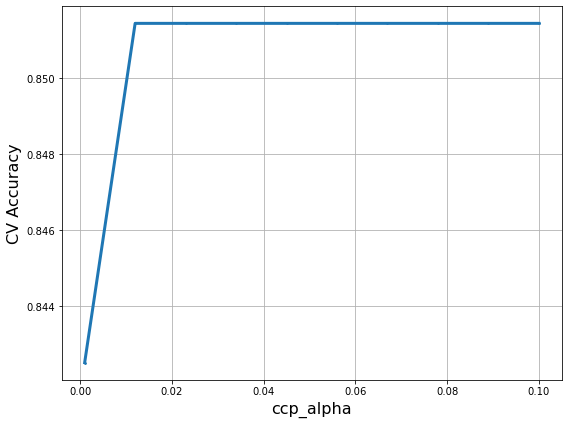

Best ccp_alpha {'ccp_alpha': 0.012}


In [275]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [276]:
y_pred = dtc_cv.predict(X_test_refined)
cm = confusion_matrix(y_test85, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test85, y_pred))

Confusion Matrix: 
 [[520   0]
 [ 95   0]]

Accuracy: 0.8455284552845529


In [277]:
grid_values = {'ccp_alpha': np.linspace(0.001, 0.1, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train_refined, y_train80)


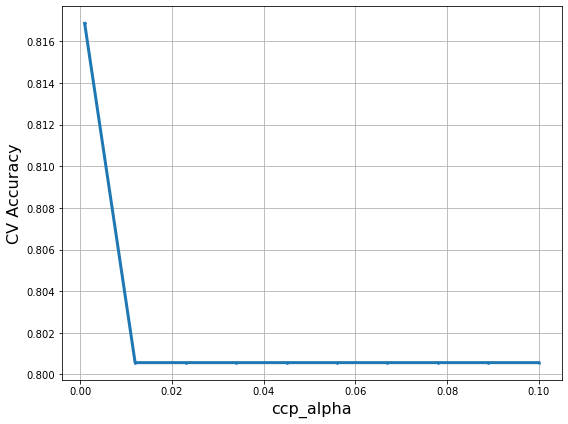

Best ccp_alpha {'ccp_alpha': 0.001}


In [278]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [279]:
y_pred = dtc_cv.predict(X_test_refined)
cm = confusion_matrix(y_test80, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test80, y_pred))

Confusion Matrix: 
 [[444  46]
 [ 76  49]]

Accuracy: 0.8016260162601626


In [282]:
grid_values = {'ccp_alpha': np.linspace(0.001, 0.1, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train_refined, y_train75)


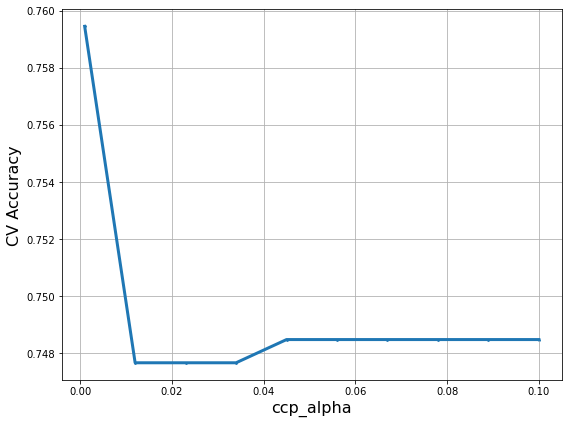

Best ccp_alpha {'ccp_alpha': 0.001}


In [283]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [284]:
y_pred = dtc_cv.predict(X_test_refined)
cm = confusion_matrix(y_test75, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test75, y_pred))

Confusion Matrix: 
 [[409  58]
 [ 91  57]]

Accuracy: 0.7577235772357723
